In [1]:
#"!pip install bs4
#!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge folium=0.5.0 --yes 
#!pip install geocoder

In [2]:
import requests
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from sklearn.cluster import KMeans
from urllib.request import urlopen

In [3]:
#Creating neighborhood dataframe

In [4]:
d = { 'Borough': ['União das Freguesias de Aldoar, Foz do Douro e Nevogilde', 'União das Freguesias de Aldoar, Foz do Douro e Nevogilde', 'União das Freguesias de Aldoar, Foz do Douro e Nevogilde', 'Bonfim', 'Campanhã', 'União das Freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória', 'União das Freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória', 'União das Freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória', 'União das Freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória', 'União das Freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória', 'União das Freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória', 'União das Freguesias de Lordelo do Ouro e Massarelos', 'União das Freguesias de Lordelo do Ouro e Massarelos', 'Paranhos', 'Ramalde'], 
     'Neighborhood': ['Aldoar', 'Foz do Douro', 'Nevogilde', 'Bonfim','Campanhã','Cedofeita', 'Santo Ildefonso', 'Sé', 'Miragaia', 'São Nicolau', 'Vitória', 'Lordelo do Ouro', 'Massarelos', 'Paranhos', 'Ramalde' ], 
     'Latitude': [41.171944, 41.1518, 41.1686, 41.1510, 41.1614, 41.1556, 41.153, 41.1433, 41.146, 41.1416, 41.1472, 41.1562, 41.150223, 41.1754, 41.1664],
     'Longitude':[-8.671389, -8.6746, -8.6870, -8.5941, -8.5764, -8.6144, -8.608, -8.6091, -8.62, -8.6156, -8.6151, -8.6517, -8.629932, -8.6075, -8.6499]}
df = pd.DataFrame(data=d)
df

,Borough,Neighborhood,Latitude,Longitude
0,"União das Freguesias de Aldoar, Foz do Douro e...",Aldoar,41.171944,-8.671389
1,"União das Freguesias de Aldoar, Foz do Douro e...",Foz do Douro,41.151800,-8.674600
2,"União das Freguesias de Aldoar, Foz do Douro e...",Nevogilde,41.168600,-8.687000
3,Bonfim,Bonfim,41.151000,-8.594100
4,Campanhã,Campanhã,41.161400,-8.576400
5,"União das Freguesias de Cedofeita, Santo Ildef...",Cedofeita,41.155600,-8.614400
6,"União das Freguesias de Cedofeita, Santo Ildef...",Santo Ildefonso,41.153000,-8.608000
7,"União das Freguesias de Cedofeita, Santo Ildef...",Sé,41.143300,-8.609100
8,"União das Freguesias de Cedofeita, Santo Ildef...",Miragaia,41.146000,-8.620000
9,"União das Freguesias de Cedofeita, Santo Ildef...",São Nicolau,41.141600,-8.615600


In [5]:
# The code was removed by Watson Studio for sharing.

In [6]:
# create map of Porto using latitude and longitude values
map_porto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_porto)  
    
map_porto

In [7]:
df.loc[0, 'Neighborhood']

'Aldoar'

In [8]:
latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(name, 
                                                               latitude, 
                                                               longitude))

Latitude and longitude values of Aldoar are 41.171944, -8.671389.


In [9]:
# create the API request URL
categoryId = "4d4b7105d754a06374d81259"
LIMIT = 200
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&categoryId={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    categoryId,
    lat, 
    lng, 
    radius, 
    LIMIT)

In [10]:
# make the GET request
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6108299624aae1771b028150'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Porto',
  'headerFullLocation': 'Porto',
  'headerLocationGranularity': 'city',
  'query': 'food',
  'totalResults': 31,
  'suggestedBounds': {'ne': {'lat': 41.175400009000015,
    'lng': -8.637966960199273},
   'sw': {'lat': 41.15739999099999, 'lng': -8.661833039800728}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5475a62f498ea3fb98db0e85',
       'name': 'Sushihana Sushi Bar',
       'location': {'address': 'Rua Prof Mota Pinto 138',
        'lat': 41.16669123517119,
        'lng': -8.65167380889653,
        'labeledLatLngs': [{'label': 'display',
          'lat':

In [11]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Sushihana Sushi Bar,Sushi Restaurant,41.166691,-8.651674
1,Pita Gourmet,Greek Restaurant,41.166948,-8.651846
2,Medit/Degrau,Restaurant,41.163477,-8.647344
3,Sushi-naka,Japanese Restaurant,41.167013,-8.652085
4,Pastelaria Lusitana,Bakery,41.167099,-8.649751


In [13]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

31 venues were returned by Foursquare.


In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&categoryId={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            categoryId,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
porto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Aldoar
Foz do Douro
Nevogilde
Bonfim
Campanhã
Cedofeita
Santo Ildefonso
Sé
Miragaia
São Nicolau
Vitória
Lordelo do Ouro
Massarelos
Paranhos
Ramalde


In [16]:
print(porto_venues.shape)
porto_venues.head()

(1247, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aldoar,41.171944,-8.671389,Soundwich,41.170314,-8.671642,Sandwich Place
1,Aldoar,41.171944,-8.671389,Pérola do Mar,41.182315,-8.669760,Bakery
2,Aldoar,41.171944,-8.671389,ElDorado,41.164253,-8.662522,Portuguese Restaurant
3,Aldoar,41.171944,-8.671389,Café do Parque da Cidade,41.170143,-8.672567,Café
4,Aldoar,41.171944,-8.671389,Mestre de Aviz,41.163100,-8.664427,Café


In [17]:
# one hot encoding
porto_onehot = pd.get_dummies(porto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
porto_onehot['Neighborhood'] = porto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [porto_onehot.columns[-1]] + list(porto_onehot.columns[:-1])
toronto_onehot = porto_onehot[fixed_columns]

porto_onehot.head()

,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,...,Snack Place,Spanish Restaurant,Steakhouse,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Aldoar
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Aldoar
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Aldoar
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Aldoar
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Aldoar


In [18]:
porto_onehot.shape

(1247, 51)

In [19]:
porto_grouped = porto_onehot.groupby('Neighborhood').sum().reset_index()
pd.set_option('display.max_columns', None)
porto_grouped

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Café,Chinese Restaurant,Comfort Food Restaurant,Creperie,Diner,Dutch Restaurant,Empanada Restaurant,Fast Food Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Food Truck,Gastropub,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Modern European Restaurant,Noodle House,Pizza Place,Portuguese Restaurant,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Spanish Restaurant,Steakhouse,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant
0,Aldoar,0,0,0,0,1,2,6,0,0,0,2,16,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,5,0,4,0,3,2,1,0,0,8,0,1,1,0,0
1,Bonfim,0,0,0,0,0,4,7,0,1,1,1,18,1,1,0,1,0,0,1,0,0,0,0,1,1,0,2,2,1,1,0,0,0,0,1,20,0,9,0,1,0,2,0,0,0,0,2,0,0,0
2,Campanhã,0,0,0,0,0,2,3,0,2,0,1,5,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,2,0,0,0,0,1,3,1,0,3,1,1,0,1,0,1,0,0,0,0,0,0
3,Cedofeita,0,1,1,1,1,0,7,1,0,5,3,11,0,0,1,3,0,0,0,0,0,0,1,0,2,0,1,0,3,2,2,1,2,0,3,19,1,8,0,3,0,2,1,3,2,1,6,0,0,2
4,Foz do Douro,0,0,0,0,0,0,8,0,0,0,3,9,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,4,2,1,0,1,0,3,10,0,14,0,1,2,0,0,0,3,0,4,0,0,0
5,Lordelo do Ouro,0,0,0,0,0,1,9,1,2,3,1,16,1,1,0,2,0,0,4,1,0,3,0,0,0,1,0,1,3,3,1,0,0,0,5,19,0,8,0,2,2,1,0,0,3,0,0,0,0,1
6,Massarelos,0,0,0,2,1,0,5,0,0,2,3,11,0,0,1,2,0,1,0,0,0,0,1,0,1,0,1,1,6,2,4,1,2,0,5,18,0,7,1,2,1,3,0,2,3,1,8,0,0,2
7,Miragaia,0,0,0,2,1,0,4,1,0,3,3,8,0,0,1,2,0,1,0,0,0,1,0,0,1,0,1,0,4,3,4,1,2,0,2,26,0,6,0,3,1,2,0,2,2,1,10,0,0,2
8,Nevogilde,0,0,0,0,1,0,8,0,1,0,3,16,0,0,0,1,0,0,2,0,1,0,0,0,1,0,0,1,3,1,1,0,0,0,5,6,0,7,0,2,10,2,0,0,4,0,4,1,0,1
9,Paranhos,0,0,0,0,0,4,13,0,1,0,4,12,0,1,1,0,0,0,2,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,2,10,0,6,0,1,0,2,0,1,1,0,1,0,0,1


In [20]:
num_top_venues = 10

for hood in porto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = porto_grouped[porto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aldoar----
                   venue  freq
0                   Café  16.0
1       Sushi Restaurant   8.0
2                 Bakery   6.0
3  Portuguese Restaurant   5.0
4            Pizza Place   4.0
5             Restaurant   4.0
6         Sandwich Place   3.0
7           Burger Joint   2.0
8     Seafood Restaurant   2.0
9              BBQ Joint   2.0


----Bonfim----
                   venue  freq
0  Portuguese Restaurant  20.0
1                   Café  18.0
2             Restaurant   9.0
3                 Bakery   7.0
4              BBQ Joint   4.0
5       Tapas Restaurant   2.0
6            Snack Place   2.0
7          Hot Dog Joint   2.0
8      Indian Restaurant   2.0
9     Italian Restaurant   1.0


----Campanhã----
                  venue  freq
0                  Café   5.0
1           Pizza Place   3.0
2                Bakery   3.0
3            Restaurant   3.0
4    Italian Restaurant   2.0
5             BBQ Joint   2.0
6  Brazilian Restaurant   2.0
7  Fast Food Restaurant   2

In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues] 

In [22]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = porto_grouped['Neighborhood']

for ind in np.arange(porto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(porto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(15)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aldoar,Café,Sushi Restaurant,Bakery,Portuguese Restaurant,Restaurant,Pizza Place,Sandwich Place,Burger Joint,BBQ Joint,Seafood Restaurant
1,Bonfim,Portuguese Restaurant,Café,Restaurant,Bakery,BBQ Joint,Indian Restaurant,Snack Place,Hot Dog Joint,Tapas Restaurant,Burger Joint
2,Campanhã,Café,Pizza Place,Restaurant,Bakery,BBQ Joint,Brazilian Restaurant,Fast Food Restaurant,Italian Restaurant,Snack Place,Steakhouse
3,Cedofeita,Portuguese Restaurant,Café,Restaurant,Bakery,Tapas Restaurant,Breakfast Spot,Burger Joint,Steakhouse,Diner,Italian Restaurant
4,Foz do Douro,Restaurant,Portuguese Restaurant,Café,Bakery,Tapas Restaurant,Italian Restaurant,Pizza Place,Sushi Restaurant,Burger Joint,Seafood Restaurant
5,Lordelo do Ouro,Portuguese Restaurant,Café,Bakery,Restaurant,Pizza Place,Fast Food Restaurant,Food,Sushi Restaurant,Italian Restaurant,Japanese Restaurant
6,Massarelos,Portuguese Restaurant,Café,Tapas Restaurant,Restaurant,Italian Restaurant,Bakery,Pizza Place,Mediterranean Restaurant,Burger Joint,Sushi Restaurant
7,Miragaia,Portuguese Restaurant,Tapas Restaurant,Café,Restaurant,Italian Restaurant,Mediterranean Restaurant,Bakery,Japanese Restaurant,Sandwich Place,Breakfast Spot
8,Nevogilde,Café,Seafood Restaurant,Bakery,Restaurant,Portuguese Restaurant,Pizza Place,Tapas Restaurant,Sushi Restaurant,Italian Restaurant,Burger Joint
9,Paranhos,Bakery,Café,Portuguese Restaurant,Restaurant,BBQ Joint,Burger Joint,Pizza Place,Italian Restaurant,Fast Food Restaurant,Snack Place


In [23]:
total_restaurants = porto_grouped['African Restaurant']+porto_grouped['American Restaurant']+porto_grouped['Arepa Restaurant']+\
porto_grouped['Argentinian Restaurant']+porto_grouped['Asian Restaurant']+porto_grouped['BBQ Joint']+\
porto_grouped['Bakery']+porto_grouped['Bistro']+porto_grouped['Brazilian Restaurant']+\
porto_grouped['Breakfast Spot']+porto_grouped['Burger Joint']+porto_grouped['Café']+\
porto_grouped['Chinese Restaurant']+porto_grouped['Comfort Food Restaurant']+\
porto_grouped['Creperie']+porto_grouped['Diner']+porto_grouped['Dutch Restaurant']+porto_grouped['Empanada Restaurant']+\
porto_grouped['Fast Food Restaurant']+porto_grouped['Fondue Restaurant']+porto_grouped['Food']+\
porto_grouped['Food Court']+porto_grouped['Gastropub']+porto_grouped['Greek Restaurant']+\
porto_grouped['Hot Dog Joint']+porto_grouped['Indian Restaurant']+\
porto_grouped['Italian Restaurant']+porto_grouped['Japanese Restaurant']+porto_grouped['Mediterranean Restaurant']+\
porto_grouped['Mexican Restaurant']+porto_grouped['Modern European Restaurant']+porto_grouped['Noodle House']+\
porto_grouped['Pizza Place']+porto_grouped['Portuguese Restaurant']+\
porto_grouped['Ramen Restaurant']+porto_grouped['Restaurant']+porto_grouped['Salad Place']+\
porto_grouped['Sandwich Place']+porto_grouped['Seafood Restaurant']+porto_grouped['Snack Place']+\
porto_grouped['Spanish Restaurant']+porto_grouped['Steakhouse']+\
porto_grouped['Sushi Restaurant']+porto_grouped['Syrian Restaurant']+porto_grouped['Tapas Restaurant']+\
porto_grouped['Thai Restaurant']+porto_grouped['Theme Restaurant']+porto_grouped['Vegetarian / Vegan Restaurant']

In [24]:
df_restaurants = pd.DataFrame(data={'Neighborhood': porto_grouped['Neighborhood'],'Total Restaurants':total_restaurants,
                                  'Mexican Restaurants':porto_grouped['Mexican Restaurant']})

In [25]:
df_restaurants.head(10)


,Neighborhood,Total Restaurants,Mexican Restaurants
0,Aldoar,58,0
1,Bonfim,78,0
2,Campanhã,31,0
3,Cedofeita,100,1
4,Foz do Douro,69,0
5,Lordelo do Ouro,94,0
6,Massarelos,100,1
7,Miragaia,100,1
8,Nevogilde,82,0
9,Paranhos,66,0


In [26]:
# set number of clusters
kclusters = 3

porto_grouped_clustering = porto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(porto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 0, 2, 0, 2, 2, 1, 0, 0], dtype=int32)

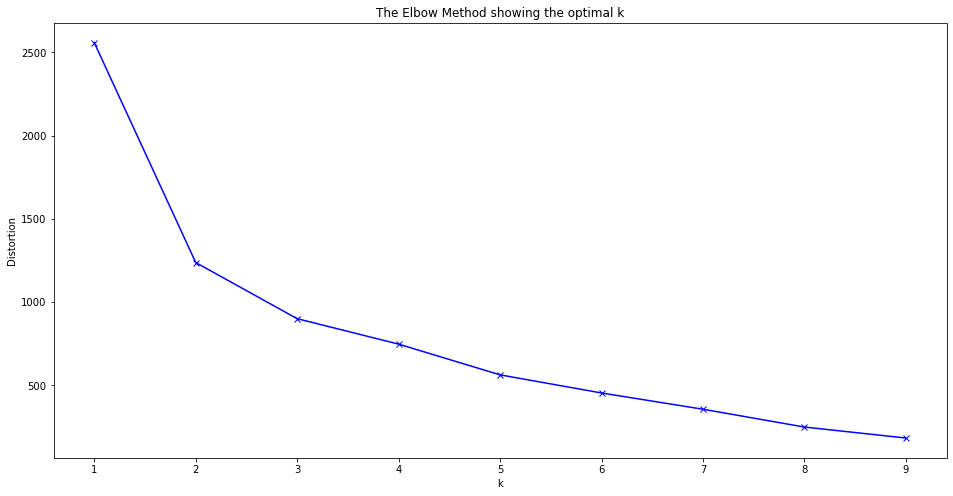

In [27]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    kmeanModel.fit(porto_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

porto_merged = df

# merge porto_grouped with porto_data to add latitude/longitude for each neighborhood
porto_merged = porto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood',how ='inner')

porto_merged.head(15) 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"União das Freguesias de Aldoar, Foz do Douro e...",Aldoar,41.171944,-8.671389,0,Café,Sushi Restaurant,Bakery,Portuguese Restaurant,Restaurant,Pizza Place,Sandwich Place,Burger Joint,BBQ Joint,Seafood Restaurant
1,"União das Freguesias de Aldoar, Foz do Douro e...",Foz do Douro,41.151800,-8.674600,0,Restaurant,Portuguese Restaurant,Café,Bakery,Tapas Restaurant,Italian Restaurant,Pizza Place,Sushi Restaurant,Burger Joint,Seafood Restaurant
2,"União das Freguesias de Aldoar, Foz do Douro e...",Nevogilde,41.168600,-8.687000,0,Café,Seafood Restaurant,Bakery,Restaurant,Portuguese Restaurant,Pizza Place,Tapas Restaurant,Sushi Restaurant,Italian Restaurant,Burger Joint
3,Bonfim,Bonfim,41.151000,-8.594100,2,Portuguese Restaurant,Café,Restaurant,Bakery,BBQ Joint,Indian Restaurant,Snack Place,Hot Dog Joint,Tapas Restaurant,Burger Joint
4,Campanhã,Campanhã,41.161400,-8.576400,0,Café,Pizza Place,Restaurant,Bakery,BBQ Joint,Brazilian Restaurant,Fast Food Restaurant,Italian Restaurant,Snack Place,Steakhouse
5,"União das Freguesias de Cedofeita, Santo Ildef...",Cedofeita,41.155600,-8.614400,2,Portuguese Restaurant,Café,Restaurant,Bakery,Tapas Restaurant,Breakfast Spot,Burger Joint,Steakhouse,Diner,Italian Restaurant
6,"União das Freguesias de Cedofeita, Santo Ildef...",Santo Ildefonso,41.153000,-8.608000,1,Portuguese Restaurant,Café,Tapas Restaurant,Restaurant,Bakery,Breakfast Spot,Steakhouse,Sandwich Place,Italian Restaurant,Japanese Restaurant
7,"União das Freguesias de Cedofeita, Santo Ildef...",Sé,41.143300,-8.609100,1,Portuguese Restaurant,Café,Tapas Restaurant,Restaurant,Bakery,Mediterranean Restaurant,Breakfast Spot,Italian Restaurant,Sandwich Place,Japanese Restaurant
8,"União das Freguesias de Cedofeita, Santo Ildef...",Miragaia,41.146000,-8.620000,1,Portuguese Restaurant,Tapas Restaurant,Café,Restaurant,Italian Restaurant,Mediterranean Restaurant,Bakery,Japanese Restaurant,Sandwich Place,Breakfast Spot
9,"União das Freguesias de Cedofeita, Santo Ildef...",São Nicolau,41.141600,-8.615600,1,Portuguese Restaurant,Tapas Restaurant,Restaurant,Café,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Sandwich Place,Breakfast Spot,Steakhouse


In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(porto_merged['Latitude'], porto_merged['Longitude'], porto_merged['Neighborhood'], porto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [30]:
porto_merged.loc[porto_merged['Cluster Labels'] == 0, porto_merged.columns[[1] + list(range(5, porto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aldoar,Café,Sushi Restaurant,Bakery,Portuguese Restaurant,Restaurant,Pizza Place,Sandwich Place,Burger Joint,BBQ Joint,Seafood Restaurant
1,Foz do Douro,Restaurant,Portuguese Restaurant,Café,Bakery,Tapas Restaurant,Italian Restaurant,Pizza Place,Sushi Restaurant,Burger Joint,Seafood Restaurant
2,Nevogilde,Café,Seafood Restaurant,Bakery,Restaurant,Portuguese Restaurant,Pizza Place,Tapas Restaurant,Sushi Restaurant,Italian Restaurant,Burger Joint
4,Campanhã,Café,Pizza Place,Restaurant,Bakery,BBQ Joint,Brazilian Restaurant,Fast Food Restaurant,Italian Restaurant,Snack Place,Steakhouse
13,Paranhos,Bakery,Café,Portuguese Restaurant,Restaurant,BBQ Joint,Burger Joint,Pizza Place,Italian Restaurant,Fast Food Restaurant,Snack Place
14,Ramalde,Café,Portuguese Restaurant,Bakery,Restaurant,Sushi Restaurant,Fast Food Restaurant,Pizza Place,BBQ Joint,Japanese Restaurant,Breakfast Spot


In [31]:
porto_merged.loc[porto_merged['Cluster Labels'] == 1, porto_merged.columns[[1] + list(range(5, porto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Santo Ildefonso,Portuguese Restaurant,Café,Tapas Restaurant,Restaurant,Bakery,Breakfast Spot,Steakhouse,Sandwich Place,Italian Restaurant,Japanese Restaurant
7,Sé,Portuguese Restaurant,Café,Tapas Restaurant,Restaurant,Bakery,Mediterranean Restaurant,Breakfast Spot,Italian Restaurant,Sandwich Place,Japanese Restaurant
8,Miragaia,Portuguese Restaurant,Tapas Restaurant,Café,Restaurant,Italian Restaurant,Mediterranean Restaurant,Bakery,Japanese Restaurant,Sandwich Place,Breakfast Spot
9,São Nicolau,Portuguese Restaurant,Tapas Restaurant,Restaurant,Café,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Sandwich Place,Breakfast Spot,Steakhouse
10,Vitória,Portuguese Restaurant,Café,Tapas Restaurant,Bakery,Restaurant,Breakfast Spot,Mediterranean Restaurant,Burger Joint,Diner,Italian Restaurant


In [32]:
porto_merged.loc[porto_merged['Cluster Labels'] == 2, porto_merged.columns[[1] + list(range(5, porto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Bonfim,Portuguese Restaurant,Café,Restaurant,Bakery,BBQ Joint,Indian Restaurant,Snack Place,Hot Dog Joint,Tapas Restaurant,Burger Joint
5,Cedofeita,Portuguese Restaurant,Café,Restaurant,Bakery,Tapas Restaurant,Breakfast Spot,Burger Joint,Steakhouse,Diner,Italian Restaurant
11,Lordelo do Ouro,Portuguese Restaurant,Café,Bakery,Restaurant,Pizza Place,Fast Food Restaurant,Food,Sushi Restaurant,Italian Restaurant,Japanese Restaurant
12,Massarelos,Portuguese Restaurant,Café,Tapas Restaurant,Restaurant,Italian Restaurant,Bakery,Pizza Place,Mediterranean Restaurant,Burger Joint,Sushi Restaurant


Text(0, 0.5, 'Count')

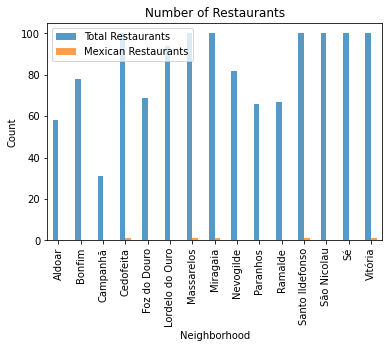

In [33]:
%matplotlib inline

ax = df_restaurants.plot(x='Neighborhood',y=['Total Restaurants','Mexican Restaurants'],kind='bar',alpha=0.75,title='Number of Restaurants')
ax.set_ylabel('Count')
